In [1]:
import os
import cv2
import math
import time
import numpy as np
from scipy.interpolate import spline
import matplotlib
%matplotlib inline
from matplotlib import pylab as plt
from IPython.display import clear_output
from sklearn.decomposition import PCA 
from os.path import join as pj
from tqdm import tqdm_notebook as tqdm
from joblib import Parallel, delayed

In [2]:
filepath_by_idx = {}

ROOT = '/data/junction'
for idx in range(91, 300):
    filenames = []
    for root, dirs, files in os.walk('{}/{}'.format(ROOT, idx)):
        for file in files:
            filenames.append(pj(root, file))
    candidates = [filename for filename in filenames if os.path.splitext(filename)[1] in ['.avi', '.mkv']]
    if len(candidates) != 1:
        print('! {} Shit candidates {} != 1'.format(idx, len(candidates)))
        for filename in filenames:
            print(filename)
    else:
        filepath_by_idx[idx] = candidates[0]

! 99 Shit candidates 0 != 1
! 101 Shit candidates 0 != 1
! 102 Shit candidates 0 != 1
! 103 Shit candidates 0 != 1
! 104 Shit candidates 0 != 1
! 105 Shit candidates 0 != 1
! 106 Shit candidates 0 != 1
! 107 Shit candidates 0 != 1
! 108 Shit candidates 0 != 1
! 109 Shit candidates 0 != 1
! 110 Shit candidates 0 != 1
! 111 Shit candidates 0 != 1
! 112 Shit candidates 0 != 1
! 113 Shit candidates 0 != 1
! 114 Shit candidates 0 != 1
! 115 Shit candidates 0 != 1
! 116 Shit candidates 0 != 1
! 117 Shit candidates 0 != 1
! 118 Shit candidates 0 != 1
! 119 Shit candidates 0 != 1
! 120 Shit candidates 0 != 1
! 121 Shit candidates 0 != 1
! 122 Shit candidates 0 != 1
! 123 Shit candidates 0 != 1
! 124 Shit candidates 0 != 1
! 125 Shit candidates 0 != 1
! 126 Shit candidates 0 != 1
! 127 Shit candidates 0 != 1
! 128 Shit candidates 0 != 1
! 129 Shit candidates 0 != 1
! 130 Shit candidates 0 != 1
! 131 Shit candidates 0 != 1
! 132 Shit candidates 0 != 1
! 133 Shit candidates 0 != 1
! 134 Shit cand

In [3]:
filepath_by_idx

{91: '/data/junction/91/42.mkv',
 92: "/data/junction/92/Singin' in the Rain.1952.BDRip/Singin' in the Rain.1952.BDRip.avi",
 93: '/data/junction/93/228.avi',
 94: '/data/junction/94/3 Idiots [2009].mkv',
 95: '/data/junction/95/Afera.1973.BDRip.avi',
 96: '/data/junction/96/Istoriya.Igrushek.3.2010.BDRip-AVC.mkv',
 97: '/data/junction/97/Besslavnie_ubliydki.avi',
 98: '/data/junction/98/Ladri.di.biciclette.1948.BDRip.745Mb.MVO.ALLFILMS.RG.avi',
 100: '/data/junction/100/Malysh.ReRip.1921.BDRip.XviD.AC3.-HQCLUB/Malysh.ReRip.1921.BDRip.XviD.AC3.-HQCLUB.avi',
 251: '/data/junction/251/Nymphomaniac.1.2013.D.HDRip.1400MB.avi',
 252: '/data/junction/252/Bezumnyi_Maks_Doroga_yarosti_2015_BDRip_by_Dalemake.avi',
 253: '/data/junction/253/The.Raid.2011.BDRip.Dub_by_LBS.avi',
 254: '/data/junction/254/Sin.City.2005.Hdrip.mkv'}

In [4]:
def just_do_it_for_filepath(filepath):
    brightness = []
    
    cap = cv2.VideoCapture(filepath)
    frame_rate = cap.get(5)  # frame rate
    
    frame_counter = 0
    while cap.isOpened():
        frame_id = cap.get(1)
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id % math.floor(frame_rate) == 0:
            frame_counter += 1

        if frame_id % 2000 == 0:
            grey = 0.2126 * frame[:, :, 0] + 0.7152 * frame[:, :, 1] + 0.0722 * frame[:, :, 2]
            brightness.append(np.average(grey))

    cap.release()
    return np.array(brightness)

(96, '/data/junction/96/Istoriya.Igrushek.3.2010.BDRip-AVC.mkv')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


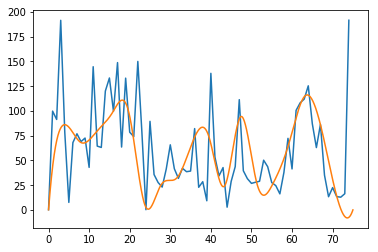

(97, '/data/junction/97/Besslavnie_ubliydki.avi')


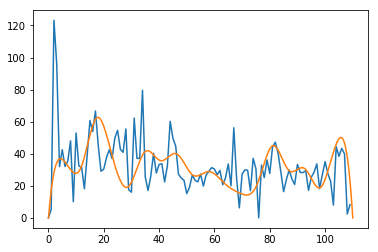

(98, '/data/junction/98/Ladri.di.biciclette.1948.BDRip.745Mb.MVO.ALLFILMS.RG.avi')


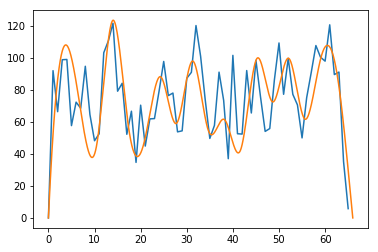

(251, '/data/junction/251/Nymphomaniac.1.2013.D.HDRip.1400MB.avi')


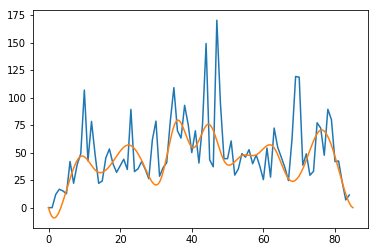

(100, '/data/junction/100/Malysh.ReRip.1921.BDRip.XviD.AC3.-HQCLUB/Malysh.ReRip.1921.BDRip.XviD.AC3.-HQCLUB.avi')


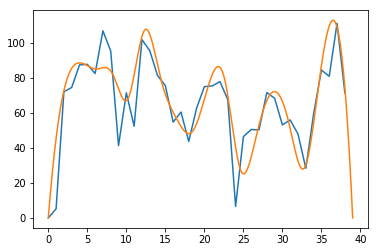

(252, '/data/junction/252/Bezumnyi_Maks_Doroga_yarosti_2015_BDRip_by_Dalemake.avi')


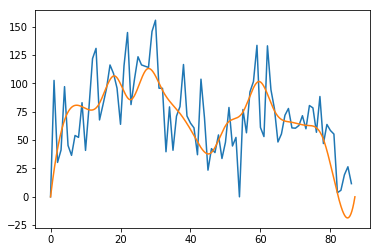

(253, '/data/junction/253/The.Raid.2011.BDRip.Dub_by_LBS.avi')


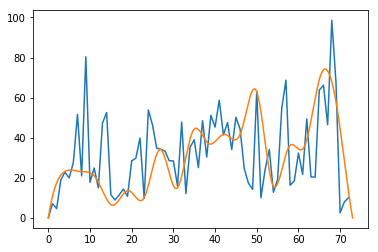

(254, '/data/junction/254/Sin.City.2005.Hdrip.mkv')


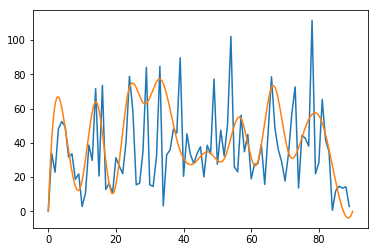

(91, '/data/junction/91/42.mkv')


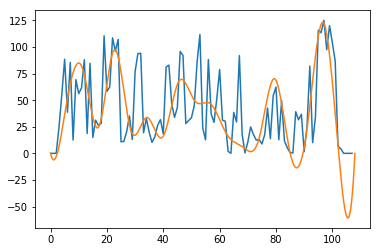

(92, "/data/junction/92/Singin' in the Rain.1952.BDRip/Singin' in the Rain.1952.BDRip.avi")


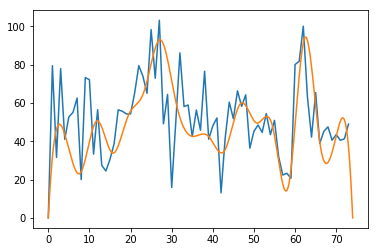

(93, '/data/junction/93/228.avi')


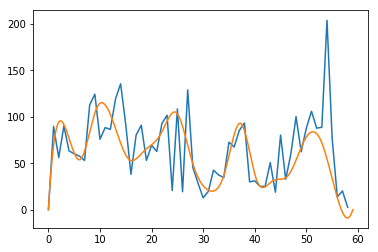

(94, '/data/junction/94/3 Idiots [2009].mkv')


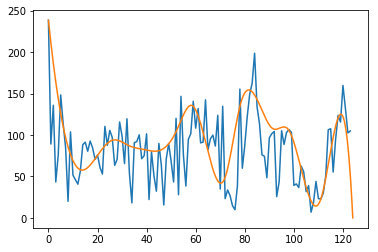

(95, '/data/junction/95/Afera.1973.BDRip.avi')


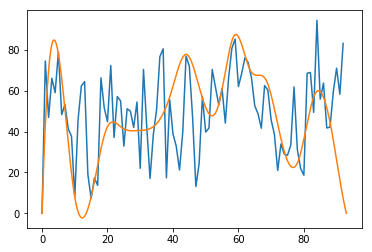

In [5]:
results_for_film = []

for idx, filepath in filepath_by_idx.items():
    print(idx, filepath)
    
    X = just_do_it_for_filepath(filepath)
    
    x_old = np.arange(len(X))
    x_new1 = np.linspace(0, len(X), 20)
    x_new2 = np.linspace(0, len(X), 4000)
    smooth = spline(x_old, X, x_new1)
    smooth = spline(x_new1, smooth, x_new2)
    
    results_for_film.append((idx, X, smooth, np.average(X)))

    plt.plot(X)
    plt.plot(x_new2, smooth)
    plt.show()

In [7]:
import json
results_for_film2 = [(idx, X.tolist(), smooth.tolist(), avgX) for idx, X, smooth, avgX in results_for_film]
with open('brightness 91-104.json', 'w') as f:
    f.write(json.dumps(results_for_film2))